# A comparison of how radical applies its correction
1. Open a radical data file (must be saved as matlab v7.3 environment->preferences->General->MAT-files->V7.3)
2. plot calibrated data
3. retrieve uncorrected DUT
4. retrieve solution vector
5. plot non reciprocal corrected data
6. plot reciprocal corrected data
7. compare with 2

In [1]:
# import libraries
from pyMeasure import *
import os
import h5py
import numpy as np

Importing Code.Analysis.Fitting
Importing Code.Analysis.Interpolation
Importing Code.Analysis.NISTUncertainty
Importing Code.Analysis.SParameter
The module smithplot was not found,please put it on the python path
Importing Code.Analysis.Uncertainty
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.GraphModels
Importing Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.MUFModels
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.TouchstoneModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
Importing Code.Utils.Names


In [2]:
# set the directory paths and file path
JUPYTER_DIRECTORY=r'C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks'
TEST_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,"Radical_Correction_Files")
RADICAL_DATA_PATH=os.path.join(TEST_DIRECTORY,"Example_HD5.mat")

In [3]:
# open the radical file
radical_data_file=h5py.File(RADICAL_DATA_PATH,'r')

In [4]:
# Explore the data in the radical data file
print("Level One: {0}".format(radical_data_file.keys()))
print("Level Two: {0}".format(radical_data_file["RadiCalData"].keys()))
def print_hd5_keys(hd5_group):
    """Prints hd5 keys and passes if there are none"""
    try:
        print hd5_group
    except: pass
radical_data_file["RadiCalData"].visit(print_hd5_keys)
# for group in radical_data_file:
#     print group

Level One: [u'#refs#', u'RadiCalData']
Level Two: [u'C', u'Count', u'Dir', u'Dut', u'DutDir', u'FigureHandle', u'Opts', u'Rdc', u'Ref', u'RefDir', u'Rs2C', u'RsL', u'StatistiCalData', u'Test', u'TestDir']
C
Count
Dir
Dir/Data
Dir/RadiCal
Dir/SpecSheetName
Dir/SpecSheetPath
Dir/StatistiCAL
Dir/SwitchTerms
Dir/SwitchTerms/Name
Dir/SwitchTerms/Path
Dir/SwitchTerms/RFName
Dir/SwitchTerms/RFPath
Dut
Dut/Calibrated
Dut/CorrectionOption
Dut/RawStandards
Dut/RecStds
Dut/Standards
Dut/StdsNames
DutDir
FigureHandle
Opts
Rdc
Ref
Ref/Calibrated
Ref/Guess
Ref/Guess/CIR
Ref/Guess/EpsEff
Ref/Guess/Error
Ref/Guess/PropConst
Ref/Guess/RsModel
Ref/Guess/S1
Ref/Guess/S1Zc
Ref/Guess/S2
Ref/Guess/S2Zc
Ref/Guess/T1
Ref/Guess/T2
Ref/Guess/Z
Ref/Lengths
Ref/MapFunc
Ref/Name
Ref/RFSwitchTerms
Ref/RawStandards
Ref/RecStds
Ref/SeriesR
Ref/SpecSheet
Ref/Standards
Ref/StdsNames
Ref/SwitchTerms
Ref/TRL
Ref/TRL/C
Ref/TRL/Eps
Ref/TRL/ErrEps
Ref/TRL/Models
Ref/TRL/Models/Rs
Ref/TRL/Models/RsCir
Ref/TRL/Models/RsErr
Re

In [44]:
# the series resistor s parameters of the X error box
frequency_list=np.array(radical_data_file["RadiCalData/StatistiCalData/F"])[0].tolist()
x_error_box_sparameters_radical_order=np.array(radical_data_file["RadiCalData/Ref/Guess/S1"])
y_error_box_sparameters_radical_order=np.array(radical_data_file["RadiCalData/Ref/Guess/S2"])

def radical_frequency_to_frequency_list(radical_frequency,radical_data_file=None):
    """Takes either the string specifying the radical frequency location ("RadiCalData/StatistiCalData/F") and 
    radical data file
    or the data set radical_data_file["RadiCalData/StatistiCalData/F"] and returns a python list of frequencies"""
    try:
        if type(radical_frequency) in StringTypes:
            frequency_list=np.array(radical_data_file[radical_frequency])[0].tolist()
        elif type(radical_frequency) in [h5py._hl.dataset.Dataset]:
            frequency_list=np.array(radical_frequency)[0].tolist()
        elif type(radical_frequency) in [h5py._hl.files.File]:
            frequency_list=np.array(radical_frequency["RadiCalData/StatistiCalData/F"])[0].tolist()
    except:
        print("Could not change {0} to a python list".format(radical_frequency))
        
        


def radical_error_boxes_to_eight_term_complex(radical_s1,radical_s2,radical_frequency_list,radical_data_file=None):
    """Takes two radical error boxes and a frequency_list (in python format run radical_frequency_to_frequency_list first)
    and converts them into a python list structure 
    [[f,S1_11,S1_12,S1_21,S1_22,S2_11,S2_12,S2_21,S_22]] where each component of a matrix is a complex number.
    This list is designed to be used as an input for correct_sparameters_eight_term"""
    try:
        # fist convert the S1 to a numpy array the dimensions are 4 x number of frequencies x 2
        if type(radical_s1) in StringTypes:
            s1_numpy_array=np.array(radical_data_file[radical_s1])
        elif type(radical_s1) in [h5py._hl.dataset.Dataset]:
            s1_numpy_array=np.array(radical_s1)
        elif type(radical_s1) in [np.ndarray]:
            s1_numpy_array=radical_s1
        else:
            raise TypeError("S1 is the wrong type")
        # second convert the S2 to a numpy array are 4 x number of frequencies x 2
        if type(radical_s2) in StringTypes:
            s2_numpy_array=np.array(radical_data_file[radical_s2])
        elif type(radical_s2) in [h5py._hl.dataset.Dataset]:
            s2_numpy_array=np.array(radical_s2)
        elif type(radical_s2) in [np.ndarray]:
            s2_numpy_array=radical_s2
        else:
            raise TypeError("S2 is the wrong type")
        # now arrange each item as complex()
        eight_term_complex_list=[]
        for frequency_index,frequency in enumerate(radical_frequency_list):
            new_row=[frequency]
            s1_row=[s1_numpy_array[i][frequency_index] for i in range(len(s1_numpy_array))]
            s1_complex_row=map(lambda x: complex(x[0],x[1]),s1_row)
            s2_row=[s2_numpy_array[i][frequency_index] for i in range(len(s2_numpy_array))]
            s2_complex_row=map(lambda x: complex(x[0],x[1]),s2_row)            
            new_row=new_row+s1_complex_row+s2_complex_row
            eight_term_complex_list.append(new_row)
        return eight_term_complex_list
    except:
        print("Could not convert the S1, S2 as given")
        raise
        
        

In [41]:
type(x_error_box_sparameters) == np.ndarray

True

In [45]:
radical_error_boxes_to_eight_term_complex(x_error_box_sparameters,y_error_box_sparameters,frequency_list)

[[0.1,
  (0.004106952042713093-0.012823131933208496j),
  (0.35636964585448383-0.7973558211886154j),
  (0.3563696458544839-0.7973558211886151j),
  (0.013721271904439036-0.05662529128075963j),
  (0.015013155131956016+0.025877253962748255j),
  (0.9834813062553368-0.31388216333780405j),
  (0.762677079880769-0.4151056990059752j),
  (0.010086969579739997-0.01442810556609748j)],
 [0.10137989680000001,
  (8.365175606148275e-05-0.014887746919554447j),
  (0.27344216291648504-0.8283910098471001j),
  (0.2734421629164851-0.8283910098471001j),
  (0.011684284833990321-0.061011195992733434j),
  (0.023428404631161484+0.020702320882566676j),
  (0.9504597695020365-0.401415975982881j),
  (0.720304310646944-0.48343432237675615j),
  (0.009072035478409133-0.017780635354967534j)],
 [0.10277883470000002,
  (-0.004045821019365636-0.01673550377987379j),
  (0.18655779519945695-0.8513203882190421j),
  (0.1865577951994571-0.8513203882190423j),
  (0.008479868037878872-0.06586272882838572j),
  (0.030716169516578355+0

In [5]:
# The corrected S parameters for short
corrected_short=np.array(radical_data_file["RadiCalData/StatistiCalData/S"])

KeyError: "Unable to open object (Object 's1' doesn't exist)"

In [6]:
# The Frequency list
frequency_list=np.array(radical_data_file["RadiCalData/StatistiCalData/F"])[0].tolist()


In [7]:
# putting them into [f,S11,S21,S12,S22] format
sparameters=[]
sparameters_flipped=[]
for index,item in enumerate(frequency_list):
    [S11,S21,S12,S22]=[complex(corrected_short[0][index][0],corrected_short[0][index][1]),
                       complex(corrected_short[1][index][0],corrected_short[1][index][1]),
                       complex(corrected_short[2][index][0],corrected_short[2][index][1]),
                       complex(corrected_short[3][index][0],corrected_short[3][index][1])]
    new_row=[item,S11,S21,S12,S22]
    sparameters.append(new_row)
    sparameters_flipped.append([item,S11,S12,S21,S22])

def radical_to_s2p(radical_data_set,frequency_list,**options):
    """Takes a radical data set that is of the form <HDF5 dataset "S1": shape (4, 512), type "|V16"> and outputs
    an S2PV1 python model. Requires frequency_list=np.array(radical_data_file["RadiCalData/StatistiCalData/F"])[0].tolist()
    to be passed"""
    defaults={"frequency_selector":0,"frequency_column_name":"Frequency"}
    s2p_options={}
    for key,value in defaults.iteritems():
        s2p_options[key]=value
    for key,value in options.iteritems():
        s2p_options[key]=value
    input_data=np.array(radical_data_set)
    for index,item in enumerate(frequency_list):
        [S11,S21,S12,S22]=[complex(input_data[0][index][0],input_data[0][index][1]),
                           complex(input_data[1][index][0],input_data[1][index][1]),
                           complex(input_data[2][index][0],input_data[2][index][1]),
                           complex(input_data[3][index][0],input_data[3][index][1])]
        new_row=[item,S11,S21,S12,S22]
        sparameters.append(new_row)
    new_s2p=S2PV1(None,sparameter_complex=sparameters,**s2p_options)
    return new_s2p

In [8]:
# make a s2p file out of them
new_s2p=S2PV1(None,sparameter_complex=sparameters)
new_s2p_flipped=S2PV1(None,sparameter_complex=sparameters_flipped)

<IPython.core.display.Javascript object>


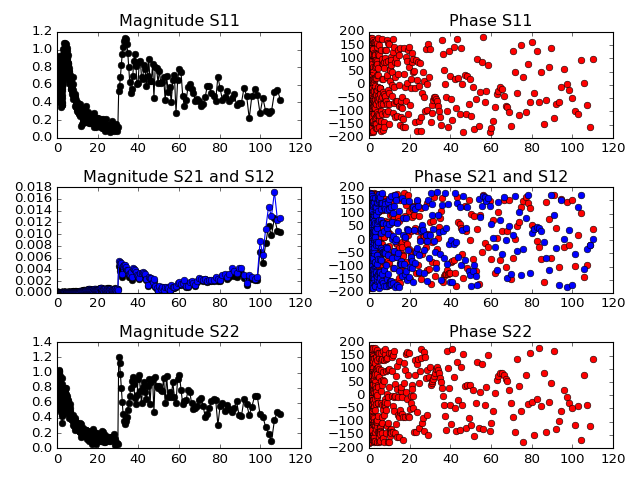

In [27]:
%matplotlib notebook
# Now show them
new_s2p.show()

<IPython.core.display.Javascript object>


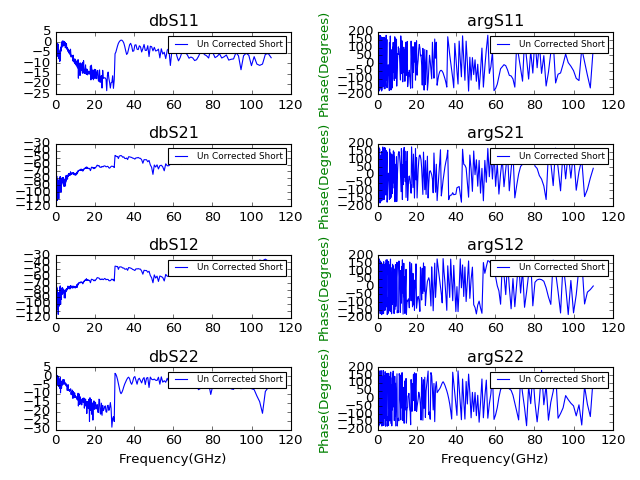

In [26]:
compare_s2p_plots([new_s2p],labels=["Un Corrected Short"],format="db")

<IPython.core.display.Javascript object>


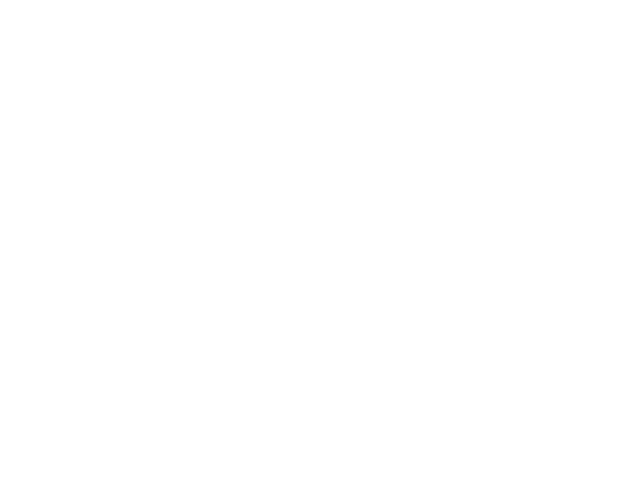

In [11]:
compare_s2p_plots([new_s2p,new_s2p_flipped],labels=["Un Corrected Short","Transmission Flipped"],format="MA")

In [13]:
# Now we need to apply a reciprocal correction to compare
# This is a standard in RadiCalData.Ref.TRL.Models.S1
np.array(radical_data_file["RadiCalData/Ref/TRL/PropConst"])

array([[(4.327997315120791, 6.159975228784386),
        (4.385229139083958, 6.22771423129437),
        (4.407793149434397, 6.339058005903882),
        (4.426160161478703, 6.364403766433242),
        (4.441221671249697, 6.417598412893422),
        (4.473914163783074, 6.506551834998112),
        (4.499796080617372, 6.517749435020379),
        (4.545062862601703, 6.636411883761766),
        (4.553450915647999, 6.662079751318635),
        (4.579570602618556, 6.730247938688518),
        (4.575300574601404, 6.794594397501413),
        (4.622981412837369, 6.8387158406792325),
        (4.629650337439094, 6.944467546163779),
        (4.679404790618076, 7.0205194870915975),
        (4.719177364553777, 7.095539527279182),
        (4.722821041063897, 7.123731209107038),
        (4.7216677888745044, 7.180906536659972),
        (4.787169679393878, 7.2683076536008056),
        (4.807639179008849, 7.335746858324234),
        (4.788177522892552, 7.383772228514806),
        (4.8214317039595, 7.470578879

In [8]:
def radical_to_s2p(radical_data_set,frequency_list,**options):
    """Takes a radical data set that is of the form <HDF5 dataset "S1": shape (4, 512), type "|V16"> and outputs
    an S2PV1 python model. Requires frequency_list=np.array(radical_data_file["RadiCalData/StatistiCalData/F"])[0].tolist()
    to be passed"""
    defaults={"frequency_selector":0,"frequency_column_name":"Frequency"}
    s2p_options={}
    for key,value in defaults.iteritems():
        s2p_options[key]=value
    for key,value in options.iteritems():
        s2p_options[key]=value
    input_data=np.array(radical_data_set)
    sparameters=[]
    for index,item in enumerate(frequency_list):
        [S11,S21,S12,S22]=[complex(input_data[0][index][0],input_data[0][index][1]),
                           complex(input_data[1][index][0],input_data[1][index][1]),
                           complex(input_data[2][index][0],input_data[2][index][1]),
                           complex(input_data[3][index][0],input_data[3][index][1])]
        new_row=[item,S11,S21,S12,S22]
        sparameters.append(new_row)
    new_s2p=S2PV1(None,sparameter_complex=sparameters,**s2p_options)
    return new_s2p

In [9]:
S1=radical_to_s2p(radical_data_file["RadiCalData/Ref/TRL/Models/S1"],frequency_list)
S=radical_to_s2p(radical_data_file["RadiCalData/StatistiCalData/S"],frequency_list)

In [10]:
compare_s2p_plots([S1,S],labels=["Corr","Un Corr"],format="DB")

<IPython.core.display.Javascript object>


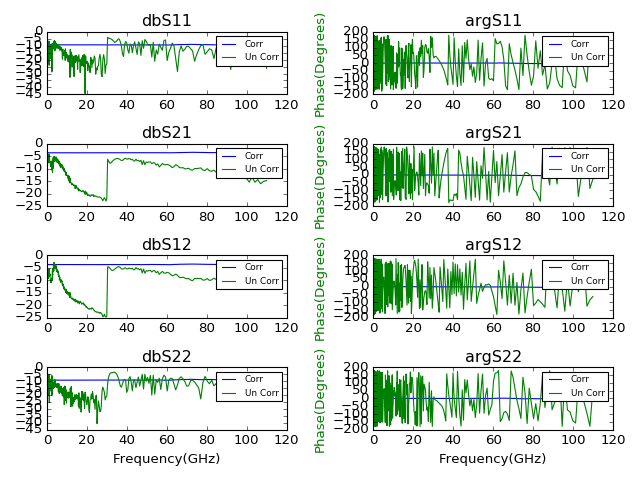

In [25]:
Rs=radical_to_s2p(radical_data_file["RadiCalData/StatistiCalData/Rs"],frequency_list)
Rs_Corrected=radical_to_s2p(radical_data_file["RadiCalData/Ref/TRL/Models/Rs"],frequency_list)
compare_s2p_plots([Rs_Corrected,Rs],labels=["Corr","Un Corr"],format="DB")

<IPython.core.display.Javascript object>


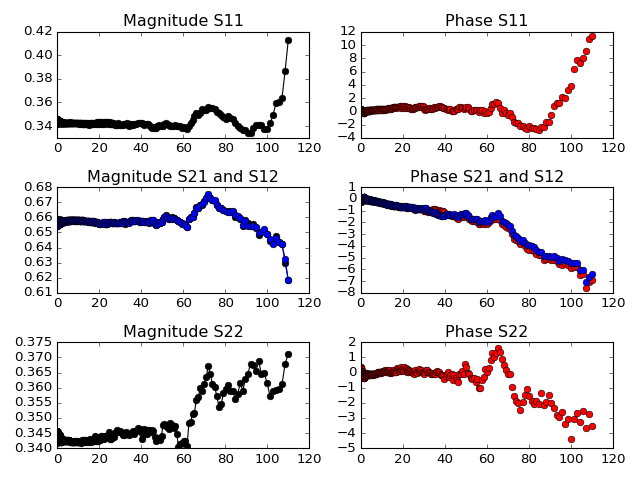

In [24]:
Rs_Corrected.show()

In [12]:
data=np.array(radical_data_file["RadiCalData/Dut/Calibrated"])

In [15]:
radical_data_file["RadiCalData/Dut/Calibrated"].attrs.items()

[(u'MATLAB_class', 'cell'), (u'H5PATH', '/RadiCalDataDut')]

In [19]:
radical_data_file[radical_data_file[np.array(radical_data_file["RadiCalData/Dut/Calibrated"])[0][0]][0][0]]

<HDF5 dataset "uu": shape (4, 512), type "|V16">

In [19]:
radical_data_file[radical_data_file[np.array(radical_data_file["RadiCalData/Dut/Calibrated"])[0][0]][0][0]].attrs.items()

[(u'MATLAB_class', 'double'), (u'H5PATH', '/#refs#/uu')]

In [33]:
radical_data_file[radical_data_file[radical_data_file["RadiCalData/Dut/Standards"][0][0]][0][0]]

<HDF5 dataset "ou": shape (9, 512), type "<f8">

In [29]:
radical_data_file["RadiCalData/Dut/Calibrated"]

<HDF5 dataset "Calibrated": shape (1, 2), type "|O">

In [20]:
DUT_1=radical_to_s2p(radical_data_file[radical_data_file[np.array(radical_data_file["RadiCalData/Dut/Calibrated"])[0][0]][0][0]],
                     frequency_list)

<IPython.core.display.Javascript object>


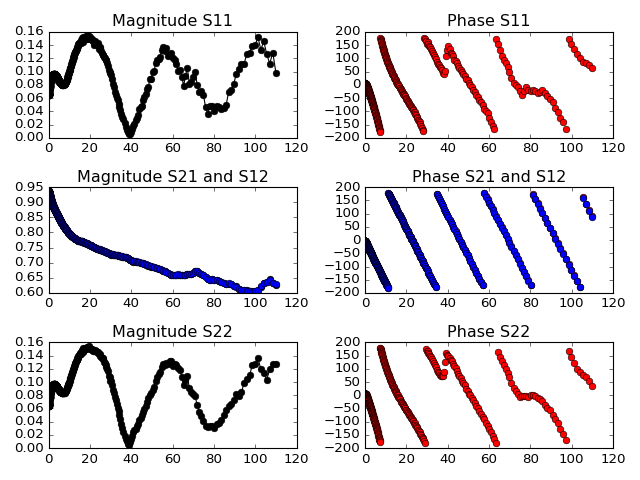

In [23]:
DUT_1.show()

In [22]:
class RadicalDataModel():
    """A container for data produced by Radical, must be in hd5 format (saved as version 7.3 or greater)"""
    def __init__(file_path=None,**options):
        """Intializes the RadicalModel changes many data objects to pyMeasure native classes, the bare
        hd5 file is self.matlab_data"""
        if file_path:
            self.matlab_data=h5py.File(file_path,"r")
        

SyntaxError: invalid syntax (<ipython-input-22-cb06db3528d6>, line 8)

In [ ]:
globals()

In [ ]:
import smithplot


In [11]:
#radical_data_file["RadiCalData/TRL/PropConst"]
radical_data_file["RadiCalData"]["Trl"]

KeyError: "Unable to open object (Object 'trl' doesn't exist)"

In [36]:
printS2PDefaults()

AttributeError: class S2PV1 has no attribute 'defaults'

In [34]:
radical_data_file.visit(print_hd5_keys)

#refs#
#refs#/0
#refs#/00
#refs#/00b
#refs#/00c
#refs#/00d
#refs#/00e
#refs#/00f
#refs#/00g
#refs#/00h
#refs#/00i
#refs#/00j
#refs#/00k
#refs#/01
#refs#/01b
#refs#/01c
#refs#/01d
#refs#/01e
#refs#/01f
#refs#/01g
#refs#/01h
#refs#/01i
#refs#/01j
#refs#/01k
#refs#/02
#refs#/02b
#refs#/02c
#refs#/02d
#refs#/02e
#refs#/02f
#refs#/02g
#refs#/02h
#refs#/02i
#refs#/02j
#refs#/02k
#refs#/03
#refs#/03b
#refs#/03c
#refs#/03d
#refs#/03e
#refs#/03f
#refs#/03g
#refs#/03h
#refs#/03i
#refs#/03j
#refs#/03k
#refs#/04
#refs#/04b
#refs#/04c
#refs#/04d
#refs#/04e
#refs#/04f
#refs#/04g
#refs#/04h
#refs#/04i
#refs#/04j
#refs#/04k
#refs#/05
#refs#/05b
#refs#/05c
#refs#/05d
#refs#/05e
#refs#/05f
#refs#/05g
#refs#/05h
#refs#/05i
#refs#/05j
#refs#/05k
#refs#/06
#refs#/06b
#refs#/06c
#refs#/06d
#refs#/06e
#refs#/06f
#refs#/06g
#refs#/06h
#refs#/06i
#refs#/06j
#refs#/06k
#refs#/07
#refs#/07b
#refs#/07c
#refs#/07d
#refs#/07e
#refs#/07f
#refs#/07g
#refs#/07h
#refs#/07i
#refs#/07j
#refs#/07k
#refs#/08
#refs#/08b
#re